# Lumped Conceptual Model

- please change the directory to the root directory of the repo

In [1]:
import os

os.chdir("../../../")
os.getcwd()

'C:\\MyComputer\\01Algorithms\\hydrology\\Hapi'

### make sure the above path refers to the root directory of the repo
├── Hapi
│   ├── Examples
│   │     ├── data
│   │     ├── GIS
│   │     ├── Hydrological model
│   │     │    ├── data
│   │     │    ├── Note books
│   │     │    │    ├── lumped-model-run-coello.ipynb (current  file)

### Import Modules

In [10]:
import datetime as dt

import Hapi.rrm.hbv_bergestrom92 as HBVLumped
import Hapi.sm.performancecriteria as PC
from Hapi.catchment import Catchment
from Hapi.rrm.routing import Routing
from Hapi.run import Run

### Paths

In [11]:
Parameterpath = "Examples/Hydrological model/data/lumped_model/Coello_Lumped2021-03-08_muskingum.txt"
MeteoDataPath = "Examples/Hydrological model/data/lumped_model/meteo_data-MSWEP.csv"

Path = "Examples/Hydrological model/data/lumped_model/"
SaveTo = "Examples/Hydrological model/data/lumped_model/"

### Meteorological data

In [12]:
start = "2009-01-01"
end = "2011-12-31"
name = "Coello"
Coello = Catchment(name, start, end)
Coello.ReadLumpedInputs(MeteoDataPath)

2022-02-24 00:24:16.724 | DEBUG    | catchment:ReadLumpedInputs:635 - Lumped Model inputs are read successfully


### Lumped model

In [13]:
# catchment area
AreaCoeff = 1530
# [Snow pack, Soil moisture, Upper zone, Lower Zone, Water content]
InitialCond = [0, 10, 10, 10, 0]

Coello.ReadLumpedModel(HBVLumped, AreaCoeff, InitialCond)

2022-02-24 00:24:19.308 | DEBUG    | catchment:ReadLumpedModel:593 - Lumped model is read successfully


### Model Parameters

In [14]:
Snow = 0  # no snow subroutine
Coello.ReadParameters(Parameterpath, Snow)

2022-02-24 00:24:21.601 | DEBUG    | catchment:ReadParameters:539 - Parameters are read successfully


In [15]:
Coello.Parameters

[0.7,
 51.1726422,
 1.147999,
 0.1,
 0.88137,
 0.82353,
 0.35651,
 0.03223,
 47.426,
 5.2744,
 1.0,
 0.2]

### Observed flow

In [16]:
Coello.ReadDischargeGauges(Path + "Qout_c.csv", fmt="%Y-%m-%d")

2022-02-24 00:24:26.270 | DEBUG    | catchment:ReadDischargeGauges:781 - Gauges data are read successfully


- the discharge data should be stored in the text file with the date stored in the first column and the discharge values in the second column

### Routing

In [17]:
# RoutingFn = Routing.TriangularRouting2
RoutingFn = Routing.Muskingum_V
Route = 1

### Run The Model

In [18]:
Run.RunLumped(Coello, Route, RoutingFn)

Model Run has finished


### Calculate performance criteria

In [19]:
Metrics = dict()

# gaugeid = Coello.QGauges.columns[-1]
Qobs = Coello.QGauges['q']

Metrics['RMSE'] = PC.RMSE(Qobs, Coello.Qsim['q'])
Metrics['NSE'] = PC.NSE(Qobs, Coello.Qsim['q'])
Metrics['NSEhf'] = PC.NSEHF(Qobs, Coello.Qsim['q'])
Metrics['KGE'] = PC.KGE(Qobs, Coello.Qsim['q'])
Metrics['WB'] = PC.WB(Qobs, Coello.Qsim['q'])

print("RMSE= " + str(round(Metrics['RMSE'], 2)))
print("NSE= " + str(round(Metrics['NSE'], 2)))
print("NSEhf= " + str(round(Metrics['NSEhf'], 2)))
print("KGE= " + str(round(Metrics['KGE'], 2)))
print("WB= " + str(round(Metrics['WB'], 2)))

RMSE= 24.59
NSE= 0.12
NSEhf= 0.21
KGE= 0.56
WB= 96.59


### Plot Hydrograph

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Lumped Model'}, xlabel='Time', ylabel='Discharge m3/s'>)

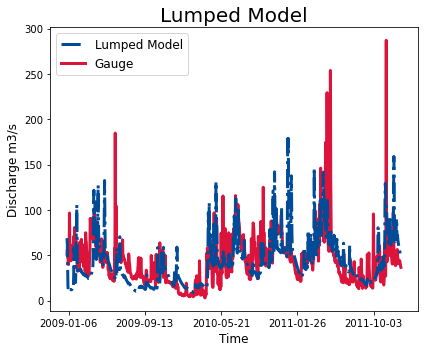

In [20]:
gaugei = 0
plotstart = "2009-01-01"
plotend = "2011-12-31"
Coello.PlotHydrograph(plotstart, plotend, gaugei, Title="Lumped Model")

### Save Results

In [22]:
StartDate = "2009-01-01"
EndDate = "2010-04-20"

Path = SaveTo + "Results-Lumped-Model_" + str(dt.datetime.now())[0:10] + ".txt"
Coello.SaveResults(Result=5, start=StartDate, end=EndDate, Path=Path)

2022-02-24 00:25:14.873 | DEBUG    | catchment:SaveResults:1366 - Data is saved successfully
